# OpenCV 사용법
## 1. 개요
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C, C++, Python 등에서 사용 가능
- 설치: pip install opencv-python

## 2. 이미지 읽어서 살펴보기
#### cv2.imread(file_name, flag)
- 이미지를 읽어 Numpy 객체로 만드는 함수
    1. file_name: 읽고자 하는 이미지 파일
    2. flag: 이미지를 읽는 방법 설정
        * IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
        * IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
        * IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
    3. 반환 값: Numpy 객체(행, 열, 색상: 기본 BGR)
- Jupyter Notebook 에서 보여줄 때는 plt.imshow()

-cv2.imread(file_name, flag)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

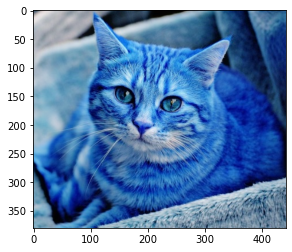

In [5]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
# cv2.imshow(title, image)
plt.imshow(image)

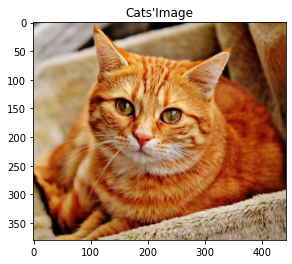

In [6]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Cats'Image")
plt.imshow(cat)

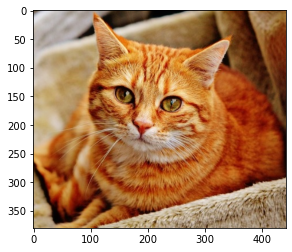

In [7]:
b, g, r = cv2.split(image)
image = cv2.merge([r,g,b])
plt.imshow(image)

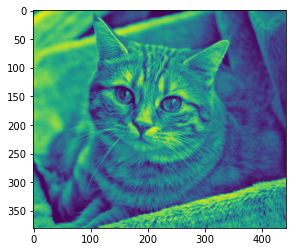

In [8]:
# Gray Scale Image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage)

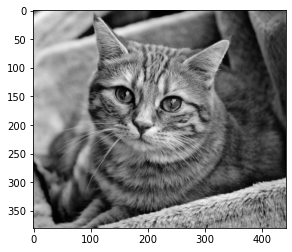

In [10]:
plt.imshow(grayImage, cmap=plt.get_cmap('gray'))

### 3. OpenCV 이미지 연산

- 픽셀수 및 이미지 크기 확인

In [13]:
image = cv2.imread('images/image_2.png')
print(image.shape)
print(image.size)

(720, 1280, 3)
2764800


- 특정 범위 픽셀 변경

In [17]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255]
print('--- %s seconds ---' % (time.time() - start_time))

--- 0.008997917175292969 seconds ---


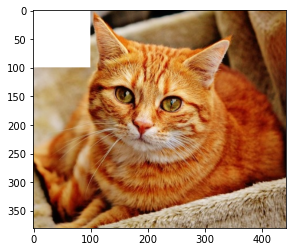

In [18]:
# cv2.imshow('Image', image)
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage)

In [19]:
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


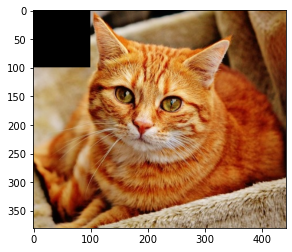

In [21]:
plt.imshow(basicImage)

# 4. opencv 이미지 변형

#### 이미지 크기 조절
#### cv2.resize(image, dsize, fx, fy, interpolation)
- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법
    * INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
    * INTER_AREA: 사이즈를 작게 할 때 주로 사용

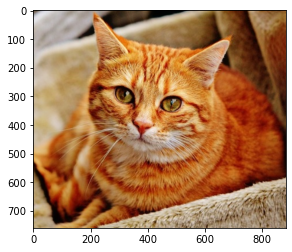

In [24]:
image = cv2.imread('images/cat.jpg')

expand = cv2.resize(image, None, fx=2.0, fy=2.0,
                   interpolation=cv2.INTER_CUBIC)
# cv2.imshow('Image', expand)
image = cv2.cvtColor(expand, cv2.COLOR_BGR2RGB)
plt.imshow(image)

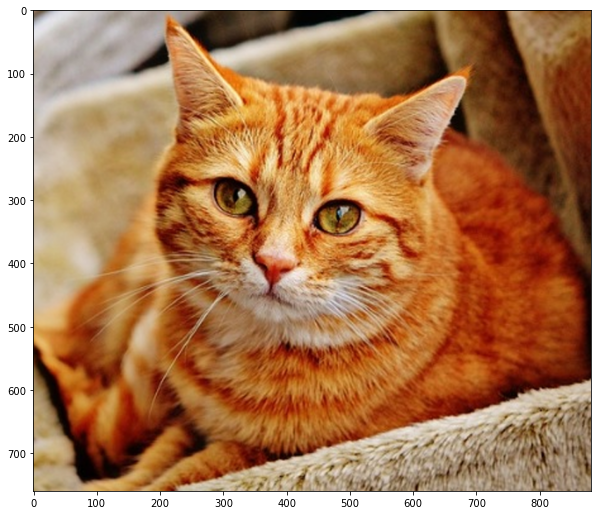

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(image)

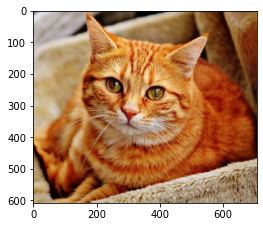

In [26]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8,
                   interpolation=cv2.INTER_AREA)
# cv2.imshow('Image', shrink)
plt.figure(figsize=(4,4))
plt.imshow(shrink)

#### 이미지 위치 변경
#### cv2.warpAffine(image, M, dsize)
- M: 변환 행렬
- dsize: Manual Size

- 변환 행렬
    * 𝑀11 𝑀12 𝑀13
    * 𝑀21 𝑀22 𝑀23
- 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동
    * (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)
- 단순 이미지 위치 변경
    * 1  0  x위치
    * 0  1  y위치

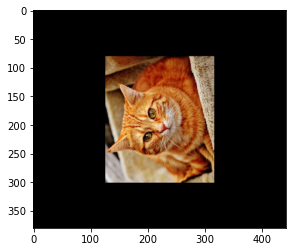

In [31]:
image = cv2.imread('images/cat.jpg')
#행과 열 정보만 저장
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

## 5. OpenCV 이미지 합치기
#### 이미지 합치기
- cv2.add(): Saturation 연산 수행. 0 보다 작으면 0, 255 보다 크면 255 로 표현
- np.add(): Modulo 연산 수행. 256은 0, 257 은 1 로 표현

In [32]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')